In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

#import prepare
#import acquire
import wrangle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# import prepare
#df = acquire.run()
#df = prepare.prepare_data(df)
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
df.shape, train_exp.shape, X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 25) (73, 25)


((362, 26), (289, 26), (289, 22), (289, 1), (73, 22), (73, 1))

In [3]:
train_exp.shape

(289, 26)

In [4]:
df.shape

(362, 26)

In [5]:
train_exp.head()

,tract,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,f_age65_comp,f_age17_comp,f_disabl_comp,...,f_mobile_trans,f_crowd_trans,f_noveh_trans,f_groupq_trans,f_trans_total,all_flags_total,zip,tract_cases_per_100k,bin_svi,rank_svi
289,48029181821,0.4879,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,78240,2771.002224,low_mod,3
200,48029171902,0.6394,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,78245,2924.011251,mod_high,2
69,48029130200,0.6523,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,78203,4177.649457,mod_high,2
29,48029121120,0.0872,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,78247,2222.089837,low,4
12,48029120502,0.9531,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,78218,3235.404493,high,1


<div class="alert alert-block alert-info"><b></b></div>

## Question One: Is there a correlation between the CDC's Range Category SVI Score and COVID-19 Infection Cases per 100k Individuals?

In [6]:
def sns_boxplot(train_exp):
    '''create boxplot for exploration'''
    #axes1.margins(x=0.05)
    plt.figure(figsize=(12,8))
    plt.rc('font', size=16)
    sns.boxplot(data=train_exp, x='bin_svi', y='tract_cases_per_100k')
    plt.title('December 8th COVID-19 Cases per 100K by SVI Range Category')
    plt.xlabel("CDC's SVI Range Category",labelpad=20)
    plt.ylabel("COVID-19 Cases per 100K",labelpad=20)
    plt.tight_layout()
    plt.show()

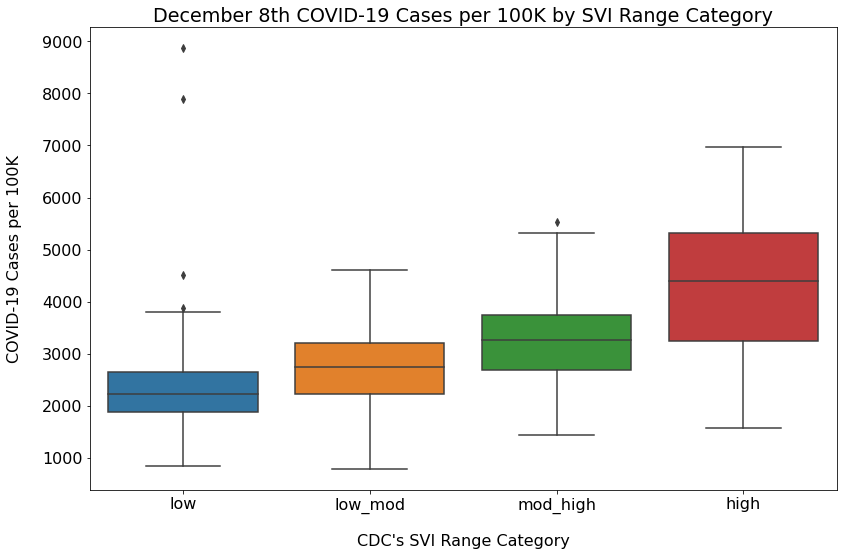

In [7]:
sns_boxplot(train_exp)

### Takeaway:
`There appears to be a correlation between COVID-19 Count and SVI Category. Next step is Hypothesis testing between categories to validate statistical significance`

In [8]:
# Mean COVID-19 Count By CDC's SVI Category
All = round(train_exp.tract_cases_per_100k.mean(),5)
low = round((train_exp[train_exp.bin_svi == 'low']).tract_cases_per_100k.mean(),5)
low_mod = round((train_exp[train_exp.bin_svi == 'low_mod']).tract_cases_per_100k.mean(),6)
mod_high = round((train_exp[train_exp.bin_svi == 'mod_high']).tract_cases_per_100k.mean(),6)
high = round((train_exp[train_exp.bin_svi== 'high']).tract_cases_per_100k.mean(),6)

print(f'The average number of cases per 100k for all CDC SVI Range Categories is {All}') 
print(f'The average number of cases per 100k for CDC SVI Range Category (low) is {low}')
print(f'The average number of cases per 100k for CDC SVI Range Category (low_mod) is {low_mod}')
print(f'The average number of cases per 100k for CDC SVI Range Category (mod_high) is {mod_high}')
print(f'The average number of cases per 100k for CDC SVI Range Category (high) is {high}')

The average number of cases per 100k for all CDC SVI Range Categories is 3221.15744
The average number of cases per 100k for CDC SVI Range Category (low) is 2409.32081
The average number of cases per 100k for CDC SVI Range Category (low_mod) is 2689.35826
The average number of cases per 100k for CDC SVI Range Category (mod_high) is 3257.328812
The average number of cases per 100k for CDC SVI Range Category (high) is 4187.892355



**Is This Difference Statistically Significant? (ANOVA/Kruskal)**

*Question - Is there a significant difference in average number of COVID-19 cases per 100k when examined by CDC SVI Range Category ?*

null = Average number of COVID-19 cases per 100k is the same across all CDC SVI Range Categories   


alternate = Average number of COVID-19 cases per 100k is significantly different counties across all CDC SVI Range Categories   


alpha = 0.01 (Let's be 99% certain the result we see aren't due to chance/randomness)   


In [9]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info

low = (train_exp[train_exp.bin_svi == 'low']).tract_cases_per_100k
low_mod = (train_exp[train_exp.bin_svi == 'low_mod']).tract_cases_per_100k
mod_high = (train_exp[train_exp.bin_svi == 'mod_high']).tract_cases_per_100k
high = (train_exp[train_exp.bin_svi== 'high']).tract_cases_per_100k

#### Variance Test

In [10]:
stats.levene(low, low_mod, mod_high, high)

LeveneResult(statistic=10.282211447884569, pvalue=1.9000204700733661e-06)

#### p-value < 0.05, Non Parametric Version of ANOVA (Kruskal)

In [26]:
alpha = 0.01
null = "Average number of COVID-19 cases per 100k is the same across all CDC SVI Range Categories "
alternate = "Average number of COVID-19 cases per 100k is significantly different counties across all CDC SVI Range Categories "

f, p = kruskal(low, low_mod, mod_high, high)
print('f=', f)
print('p=', p)
print('\n')
if p < alpha:
    print("We reject the null that: \n", null)
    print('\n')
    print("We move forward with the alternative hypothesis that: \n", alternate)
else:
    print("We fail to reject the null")
    print("Evidence does not support the claim that smoking status and time of day are dependent/related")

r= 105.3219129304518
p= 1.1140455293171267e-22


We reject the null that: 
 Average number of COVID-19 cases per 100k is the same across all CDC SVI Range Categories 


We move forward with the alternative hypothesis that: 
 Average number of COVID-19 cases per 100k is significantly different counties across all CDC SVI Range Categories 


**Takeaway**

`We can state with 99% certainty that there is a statistically significant difference between all of the CDC SVI Range Categories`

<div class="alert alert-block alert-info"><b></b></div>

## Question Two: Is there a correlation between raw_svi and cases per 100k?

#### Pearsons R

In [12]:
# isolate variables to test
raw_svi = train_exp.raw_svi
cases_per_100k = train_exp.tract_cases_per_100k
null = "There is no statistically significant difference betweeen raw_svi and cases per 100K "
alternate = "There is a statistically significant difference betweeen raw_svi and cases per 100K"

In [24]:
def pearson(continuous_var1, continuous_var2, null, alternate):
    '''
    runs pearson r test on 2 continuous variables
    '''
    alpha = .01
    r, p = stats.pearsonr(continuous_var1, continuous_var2)
    print('r=', r)
    print('p=', p)
    print('\n')
    if p < alpha:
        print("We reject the null that: \n", null)
        print('\n')
        print("We move forward with the alternative hypothesis that: \n", alternate)
    else:
        print("We fail to reject the null")
        print("Evidence does not support the claim that smoking status and time of day are dependent/related")


In [25]:
pearson(raw_svi,cases_per_100k, null, alternate)

r= 0.5516268113519615
p= 2.0695040919453683e-24


We reject the null that: 
 There is no statistically significant difference betweeen raw_svi and cases per 100K 


We move forward with the alternative hypothesis that: 
 There is a statistically significant difference betweeen raw_svi and cases per 100K


## explore.py Function